In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Loading and Inspecting the Data

We will be working with a dataset of audiobooks downloaded from audible.in from 1998 to 2025 (pre-planned releases). [Source](https://www.kaggle.com/datasets/snehangsude/audible-dataset)

The first thing we will do is load the raw audible data.

### Instructions:
* Using pandas, read the `audible_raw.csv` file that is located inside the `data` folder in our local directory. Assign to `audible`.
* Show the first few rows of the `audible` data frame.

In [2]:
# Load the audible_raw.csv file
audible = pd.read_csv("data/audible_raw.csv")
# View the first rows of the dataframe
audible.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


### 💾 The data

- "name" - The name of the audiobook.
- "author" - The audiobook's author.
- "narrator" - The audiobook's narrator.
- "time" -  The audiobook's duration, in hours and minutes.
- "releasedate" -  The date the audiobook was published.
- "language" -  The audiobook's language.
- "stars" -  The average number of stars (out of 5) and the number of ratings (if available).
- "price" -  The audiobook's price in INR (Indian Rupee).

 We can use the `.info()` method to inspect the data types of the columns

In [3]:
# Inspect the columns' data types
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


## Task 2: Clean text data in Author and Narrator columns

We will start cleaning some of the text columns like `author` and `narrator`. We can remove the `Writtenby:` and `Narratedby:` portions of the text in those columns.

For this, we will use the `.str.replace()` method

### Instructions:
* Remove 'Writtenby:' from the `author` column
* Remove 'Narratedby:' from the `narrator` column
* Check the results

In [4]:
# Remove Writtenby: from the author column
audible['author'] = audible['author'].str.replace("Writtenby:", "")
# Remove Narratedby: from the narrator column
audible['narrator'] = audible['narrator'].str.replace("Narratedby:", "")
# Check the results
audible

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


## Task 3: Extract number of stars and ratings from Stars column.

The `stars` column combines the number of stars and the number of ratins. Let's turn this into numbers and split it into two columns: `rating_stars` and `n_ratings`.

First we will use the `.sample()` method to get a glimpse at the type of entries in that column.

In [5]:
# Get a glimpse of the stars column
audible.stars.sample(n=10)

23909               Not rated yet
47569               Not rated yet
6069                Not rated yet
61120    3 out of 5 stars1 rating
9941                Not rated yet
13882               Not rated yet
58061               Not rated yet
16142               Not rated yet
34129               Not rated yet
70838               Not rated yet
Name: stars, dtype: object

Since there are many instances of `Not rated yet`, let's filter them out and sample again:

In [6]:
# Explore the values of the star column that are not 'Not rated yet'
audible[audible["stars"] != "Not rated yet"].stars.sample(n=10)

56555        5 out of 5 stars1 rating
30287        5 out of 5 stars1 rating
25018       5 out of 5 stars2 ratings
27295    4.5 out of 5 stars15 ratings
58727        5 out of 5 stars1 rating
80102       5 out of 5 stars2 ratings
65313     2.5 out of 5 stars2 ratings
11820     3.5 out of 5 stars2 ratings
53337     4.5 out of 5 stars6 ratings
13107        5 out of 5 stars1 rating
Name: stars, dtype: object

In [7]:
audible[audible.stars.str.contains(",") == True].stars.sample(n=10)

62320    4.5 out of 5 stars1,838 ratings
49825    4.5 out of 5 stars1,107 ratings
35942     5 out of 5 stars12,569 ratings
58570    4.5 out of 5 stars5,973 ratings
41082      5 out of 5 stars5,500 ratings
44477    4.5 out of 5 stars1,088 ratings
27293    4.5 out of 5 stars1,807 ratings
7551       5 out of 5 stars1,423 ratings
62294    4.5 out of 5 stars4,184 ratings
26754    4.5 out of 5 stars2,924 ratings
Name: stars, dtype: object

As a first step, we can replace the instances of `Not rated yet` with `NaN`

In [8]:
# Replace 'Not rated yet' with NaN
audible['stars'].replace("Not rated yet", np.nan, inplace = True)

We can use `.str.extract()` to get the number of stars and the number of ratings into their own columns.

### Instructions:
* Extract the number of stars into the `rating_stars` column
* Extract the number of ratings into the `n_ratings` column
* Convert both new columns to float

In [9]:
# Extract number of stars into rating_stars and turn into float
audible['rating_stars'] = audible['stars'].str.extract(r"(^[\d.]+)").astype("float")
# Replace the comma, extract number of ratings into n_ratings and turn into float
audible['n_ratings'] = audible['stars'].str.replace(",",'').str.extract(r"s([\d]+)").astype("float")
# Examine the new rating_stars and n_ratings columns
audible[['rating_stars', 'n_ratings']]

,rating_stars,n_ratings
0,5.0,34.0
1,4.5,41.0
2,4.5,38.0
3,4.5,12.0
4,4.5,181.0
...,...,...
87484,NaN,NaN
87485,NaN,NaN
87486,NaN,NaN
87487,NaN,NaN


As a last step, let's delete the `stars` column using the `.drop` command:

In [10]:
# Drop the stars column
audible.drop('stars', axis=1, inplace=True)
# Check the results
audible

,name,author,narrator,time,releasedate,language,price,rating_stars,n_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,468.00,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,820.00,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,410.00,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,615.00,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,820.00,4.5,181.0
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,596.00,NaN,NaN
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,820.00,NaN,NaN
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,938.00,NaN,NaN
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,680.00,NaN,NaN


## Task 4: Change data types

Another important step is to have our data in the correct data types

### Instructions:
* Set `price` to float
* Turn `rating_stars` to category
* Convert `releasedate` to datetime

In [11]:
# Explore the price column
audible.price.sample(n=10)

26048    468.00
25622    300.00
58083    574.00
62901    537.00
59179      Free
66033    585.00
38459    836.00
30646    949.00
26021    645.00
30260    735.00
Name: price, dtype: object

In [12]:
audible.price.str.contains("Free").value_counts()

False    87151
True       338
Name: price, dtype: int64

We need to get rid of the comma and the word 'Free' before we can convert the data.

In [13]:
# Replace the comma with ''
audible.price = audible.price.str.replace(',', '')
# Replace 'Free' with 0
audible.price = audible.price.str.replace('Free', '0')
# Turn price to float
audible.price = audible.price.astype("float")

audible.price.sample(n=10)

79611     139.0
81348     569.0
13052     305.0
38960     836.0
44301    1055.0
40559     703.0
58527     668.0
81490     668.0
47522     562.0
5043      190.0
Name: price, dtype: float64

* Turn `rating_stars` to category

Since `stars` can only take a small number of discrete values, the best data type for the column is `category`.

Let's first look at the unique values in that column to confirm:

In [14]:
# Look at the unique values in the rating_stars column
audible.rating_stars.unique()

array([5. , 4.5, 4. , nan, 3.5, 3. , 1. , 2. , 2.5, 1.5])

We can now use `.astype` to change the data type.

In [15]:
# Turn rating_stars to category
audible['rating_stars'] = audible['rating_stars'].astype("category")
audible['rating_stars'].info

C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


<bound method Series.info of 0        5.0
1        4.5
2        4.5
3        4.5
4        4.5
        ... 
87484    NaN
87485    NaN
87486    NaN
87487    NaN
87488    NaN
Name: rating_stars, Length: 87489, dtype: category
Categories (9, float64): [1.0, 1.5, 2.0, 2.5, ..., 3.5, 4.0, 4.5, 5.0]>

* Convert `releasedate` date to datetime

Here we will use the `to_datetime()` function to turn the dates into datetime objects:

In [16]:
# Convert releasedate to datetime
audible.releasedate = pd.to_datetime(audible.releasedate)
# Inspect the dataframe 
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   time          87489 non-null  object        
 4   releasedate   87489 non-null  datetime64[ns]
 5   language      87489 non-null  object        
 6   price         87489 non-null  float64       
 7   rating_stars  15072 non-null  category      
 8   n_ratings     15072 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 5.4+ MB


## Task 5: Extract hours and minutes from the `time` column

The `time` column combines the number of hours and minutes into one column. We want to transform and consolidate the information into a new `time_minutes` column.

In [17]:
# Explore the values in the time column
audible.time.sample(n=10)

60366    11 hrs and 23 mins
32163     5 hrs and 21 mins
44433    16 hrs and 10 mins
55575    19 hrs and 38 mins
28272     3 hrs and 23 mins
46372     7 hrs and 54 mins
2151                45 mins
59143     16 hrs and 3 mins
66832     4 hrs and 23 mins
46479      8 hrs and 8 mins
Name: time, dtype: object

Let's see what other ways they have encoded `min` or `minutes`:

In [18]:
# Search the entries in the time column for different spellings of min. Let' try min, mins, minutes
print(audible.time[audible.time.str.contains('mins')].count())
audible.time[audible.time.str.contains('mins')].sample(n=5)

84436


27456    12 hrs and 17 mins
49227     2 hrs and 28 mins
1469                 3 mins
82048     10 hrs and 3 mins
31520     2 hrs and 57 mins
Name: time, dtype: object

In [19]:
# Search the entries in the time column for different spellings of min. Let' try min, mins, minutes
print(audible.time[audible.time.str.contains('min')].count() - audible.time[audible.time.str.contains('mins')].count())
audible.time[audible.time.str.contains('min')].sample(n=5)

1710


75781    9 hrs and 51 mins
57613    8 hrs and 41 mins
62171    6 hrs and 54 mins
2009                2 mins
4447               52 mins
Name: time, dtype: object

In [20]:
# Search the entries in the time column for different spellings of min. Let' try min, mins, minutes
print(audible.time[audible.time.str.contains('minute')].count())
audible.time[audible.time.str.contains('minute')].sample(n=5)

61


6243     Less than 1 minute
24070    Less than 1 minute
87159    Less than 1 minute
1401     Less than 1 minute
10895    Less than 1 minute
Name: time, dtype: object

In [21]:
# Search the entries in the time column for different spellings of min. Let' try min, mins, minutes
print(audible.time[audible.time.str.contains('hrs')].count())
audible.time[audible.time.str.contains('hrs')].sample(n=5)

67356


73639     4 hrs and 51 mins
68150      2 hrs and 8 mins
24568    15 hrs and 42 mins
54938     5 hrs and 30 mins
57160     7 hrs and 49 mins
Name: time, dtype: object

In [22]:
# Search the entries in the time column for different spellings of min. Let' try min, mins, minutes
print(audible.time[audible.time.str.contains('hr')].count() - audible.time[audible.time.str.contains('hrs')].count())
audible.time[audible.time.str.contains('hr')].sample(n=5)

6727


21891     6 hrs and 56 mins
70057    13 hrs and 43 mins
84361     4 hrs and 29 mins
22435     8 hrs and 22 mins
46270     6 hrs and 23 mins
Name: time, dtype: object

We can see that we need to fix the following:
* hr, hrs -> consolidate as `hr`
* min, mins -> consolidate as `min`
* Less than 1 minute -> round to 1 min

In [23]:
# Replace hrs, mins, and 'Less than 1 minute'
audible.time = audible.time.str.replace('hrs', 'hr')
audible.time = audible.time.str.replace('mins', 'min')
audible.time = audible.time.str.replace('Less than 1 minute', '1 min')

Let's see how it looks now:

In [24]:
# Check the results
audible.time.sample(n=10)

61621      7 hr and 9 min
75038    10 hr and 46 min
43839     8 hr and 30 min
27312     1 hr and 27 min
19967              18 min
65195     8 hr and 40 min
40204    11 hr and 53 min
74778     6 hr and 29 min
76696     8 hr and 10 min
19264    11 hr and 58 min
Name: time, dtype: object

The next step is to extract the number of hours and minutes from the text, then combine in a new `time_mins` column.

### Instructions: 
* Extract the number of hours from `time`. Assign to the `hours` variable.
* Extract the number of minutes from `time`. Assign to the `mins` variable.
* Create the `time_mins` column combining hours and minutes.

In [25]:
audible.head()

,name,author,narrator,time,releasedate,language,price,rating_stars,n_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hr and 20 min,2008-04-08,English,468.0,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hr and 8 min,2018-01-05,English,820.0,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hr and 3 min,2020-06-11,English,410.0,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hr and 16 min,2021-05-10,English,615.0,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hr,2010-01-13,English,820.0,4.5,181.0


In [26]:
audible.time.str.extract(r"(\d+) min")

,0
0,20
1,8
2,3
3,16
4,NaN
...,...
87484,34
87485,7
87486,4
87487,8


In [27]:
# Extract the number of hours, turn to integer
hours = audible.time.str.extract(r"(\d+) hr").fillna(0).astype("int")
# Extract the number of minutes, turn to integer
mins = audible.time.str.extract(r"(\d+) min").fillna(0).astype("int")
# Combine hours and minutes into the time_mins column
audible['time_mins'] = hours * 60 + mins
# Check the results
audible['time_mins']

0         140
1         788
2         123
3         676
4         600
         ... 
87484     454
87485     607
87486    1144
87487     248
87488     361
Name: time_mins, Length: 87489, dtype: int32

And as final step, let's delete the columns we don't need any more:

In [28]:
# Drop the time column
audible.drop('time', axis=1, inplace=True)

Here is how our dataframe looks now:

In [29]:
# Inspect the dataframe 
audible.sample(n=10)

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,time_mins
80151,Poco meno degli angeli,MauroRuggiero,ClaudioCarini,2022-01-20,italian,382.0,NaN,NaN,461
5456,The Inquisitor's Tale,"AdamGidwitz,BenjaminBagby","AdamGidwitz,VikasAdam,MarkBramhall,",2016-09-27,English,1256.0,NaN,NaN,622
29557,The 7-Minute Productivity Solution,JohnBrandon,GeorgeW.Sarris,2022-01-18,English,586.0,NaN,NaN,395
72755,Longing for Her Wolves,TaraWest,StephanieRose,2019-09-04,English,586.0,NaN,NaN,515
53509,A Living Friend,RobertBly,"RobertBly,ColemanBarks",2021-08-28,English,233.0,NaN,NaN,69
47357,Ja siihen liittyy tarina,"JeffreyArcher,Britt-MarieNorrgård-translator",JoonasKaariainen,2022-01-26,finnish,233.0,NaN,NaN,527
40804,Gli armeni,GabriellaUluhogian,CarlottaViscovo,2021-03-23,italian,574.0,NaN,NaN,532
61748,Praying the Scriptures for Your Children,"JodieBerndt,FernNichols",SarahZimmerman,2018-05-29,English,586.0,5.0,1.0,368
71547,Mi jefe [Resisting the Boss],WhitneyG.,"JaimeCollepardo,CarlaToledano",2022-02-15,spanish,703.0,NaN,NaN,895
61760,Mindful Parenting in a Chaotic World,NicoleLibinPhD,ChelseaStephens,2019-10-12,English,233.0,5.0,1.0,132


## Task 6: Check data ranges

Another important step is to confirm that the values in our columns are in the expected ranges and that we don't have out-of-range values.

Let's create a histogram of the numeric columns to visually inspect ht ranges and the shape of the distribution:

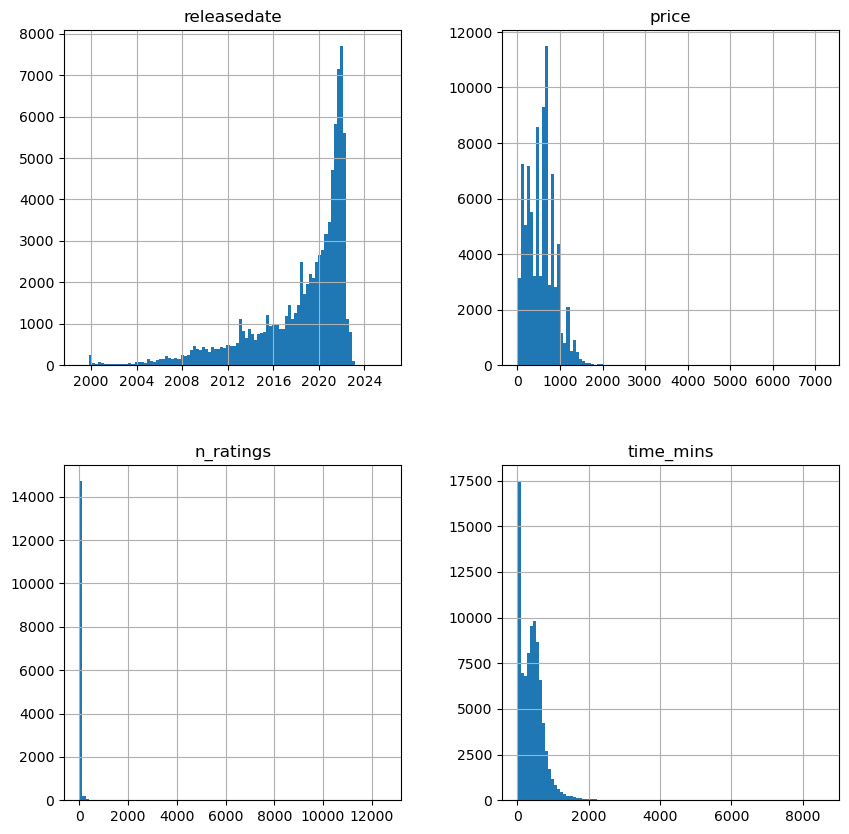

In [30]:
# Plot histograms of all the numerical columns
audible.hist(figsize=(10, 10), bins=100)
plt.show()

Additionally, we can use `.describe()` to look at a summary of our data

In [31]:
# Look at the numeric columns
audible.describe()

,price,n_ratings,time_mins
count,87489.000000,15072.000000,87489.000000
mean,559.009246,21.613190,417.497663
std,336.096642,207.479634,364.559399
min,0.000000,1.000000,1.000000
25%,268.000000,1.000000,142.000000
50%,585.000000,2.000000,386.000000
75%,755.000000,7.000000,584.000000
max,7198.000000,12573.000000,8595.000000


In [32]:
audible.describe(include='object')

,name,author,narrator,language
count,87489,87489,87489,87489
unique,82767,48374,29717,36
top,The Art of War,"矢島雅弘,石橋遊",anonymous,English
freq,20,874,1034,61884


In [33]:
# Look at the non numeric columns
audible.describe(exclude=[np.number])

C:\Users\deel\AppData\Local\Temp\ipykernel_19464\2838511557.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  audible.describe(exclude=[np.number])


,name,author,narrator,releasedate,language,rating_stars
count,87489,87489,87489,87489,87489,15072.0
unique,82767,48374,29717,5058,36,9.0
top,The Art of War,"矢島雅弘,石橋遊",anonymous,2018-05-16 00:00:00,English,5.0
freq,20,874,1034,773,61884,6761.0
first,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2025-11-14 00:00:00,NaN,NaN


We will transform the prices in `price` to USD for this exercise. We can use the exchange rate of 1 USD = 0.012 INR:

In [34]:
# Transform prices to USD (multiply times 0.012)
audible.price = audible.price * 0.012
# Check the results
audible.price.sample(n=10)

72441    10.044
42561     8.016
25614     4.128
50502     6.420
39574     9.048
58558     9.840
21562     7.740
16758     6.468
24263     7.020
66168     7.020
Name: price, dtype: float64

There values in the `language` column have different capitalization. Let's fix that.

In [35]:
# Inspect the language column before making changes
audible.language.sample(10)

34757    spanish
18630    italian
40146    English
68258     german
58279    English
85008    English
48223    English
21759    English
73337    English
43664    English
Name: language, dtype: object

In [36]:
# Update capitalization in the language column
audible.language =  audible.language.str.lower()
# Check the results
audible.language.sample(10)

61373     english
76229     english
19061     russian
68733    japanese
14394     spanish
27479     english
41747     english
82712     english
74289     english
52654     english
Name: language, dtype: object

## Task 7: Checking for duplicates

How many duplicates do we have?

As a first step look for duplicates using `.duplicated()` and `.sum()`:

In [37]:
# Look for duplicate rows
audible.duplicated().sum()

0

It is useful to look for duplicates only using a subset of the columns that make sense. We will use the following subset of columns:
* name
* author
* narrator
* time_mins
* price

Here we use `.duplicated()` again, but with our subset of columns.

In [38]:
# Create a list of our subset columns and assign to subset_cols
sub = ['name', 'author', 'narrator', 'time_mins', 'price']
# Check for duplicates using our subset of columns
audible.duplicated(subset=sub).sum()

70

Let's look at those values (use `keep=false`) and see what is going on:

In [39]:
# Check the duplicated rows keeping the duplicates and order by the name column
audible[audible.duplicated(keep = False, subset=sub)].sort_values(by='name')

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,time_mins
63978,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-14,german,2.796,NaN,NaN,144
63965,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-23,german,2.796,NaN,NaN,144
24625,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2015-09-25,english,7.032,NaN,NaN,495
24116,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2020-10-15,english,7.032,NaN,NaN,495
16971,Adagio in Dm,BillBrown,BillBrown,2021-06-08,english,5.472,NaN,NaN,78
...,...,...,...,...,...,...,...,...,...
18338,What I Talk About When I Talk About Running,HarukiMurakami,RayPorter,2016-07-07,english,4.776,4.5,193.0,263
38021,When Women Ruled the World,KaraCooney,KaraCooney,2018-11-30,english,10.032,4.5,14.0,555
20260,When Women Ruled the World,KaraCooney,KaraCooney,2018-11-30,english,10.032,4.5,13.0,555
22158,Wings of Fire,"APJAbdulKalam,ArunTiwari",GirishKarnad,2020-01-04,english,0.900,5.0,1823.0,75


We can see that the duplicates are for files with different release dates. We can decide to keep the record with the last release date.

We will can use the `drop_duplicates()` method with the same subset and using `keep=last` to keep the last release date

In [40]:
# Drop duplicated rows keeping the last release date
audible.drop_duplicates(subset=sub, keep='last', inplace=True)

We can check again for duplicates:

In [41]:
# Check again for duplicates using our subset of columns
audible.duplicated(subset=sub).sum()

0

## Task 8: Dealing with missing data

Before we finish, let's take a look at missing data in our columns. We can use the `.isna()` method and chain it with `.sum()` to get the total:

In [42]:
# Check for null values
audible.isna().sum()

name                0
author              0
narrator            0
releasedate         0
language            0
price               0
rating_stars    72387
n_ratings       72387
time_mins           0
dtype: int64

We could turn the **NaN** values to 0 or another numeric value, or we could keep them. It depends on our use case.

If we want to plot the ratings distribution, it can make sense to drop audiobooks with no ratings. But if we need to use the distribution of prices for our analysis, then removing audiobooks with no ratings will bias our results (since unrated audiobooks are likely more niche and might have a different pricing structure than rated audiobooks).

We will keep the unrated audiobooks for now.

## Task 9: Save the cleaned data set

We can use the `.to_csv` method to save the clean file. We include `index=False` so that we don't also copy the current index to our destination file.

In [43]:
# Save the dataframe to a new file: 'audible_clean.csv'
# audible.to_csv("audible_clean.csv", index=False)

In [44]:
true = pd.read_csv("data/audible_clean.csv")
ans = pd.read_csv("audible_clean.csv")

In [45]:
(true == ans).count()

name            87419
author          87419
narrator        87419
releasedate     87419
language        87419
price           87419
rating_stars    87419
n_ratings       87419
time_mins       87419
dtype: int64

In [46]:
print(len(true))
print(len(ans))

87419
87419


### Now we are sure that our data is the same as answer, so our data is clean and ready for the next stage.